## Chargement des packages

In [1]:
# Importation des bibliothèques nécessaires
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

## Importation et nettoyage des données

In [2]:
# Chargement des données
df = pd.read_csv('diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
# Analyse des informations générales surle DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [4]:
# Vérification des valeurs manquantes
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [5]:
# Vérification des doublons
len(df[df.duplicated() == True])

0

## Analyse univarié

In [6]:
# Analyse descriptive des données
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


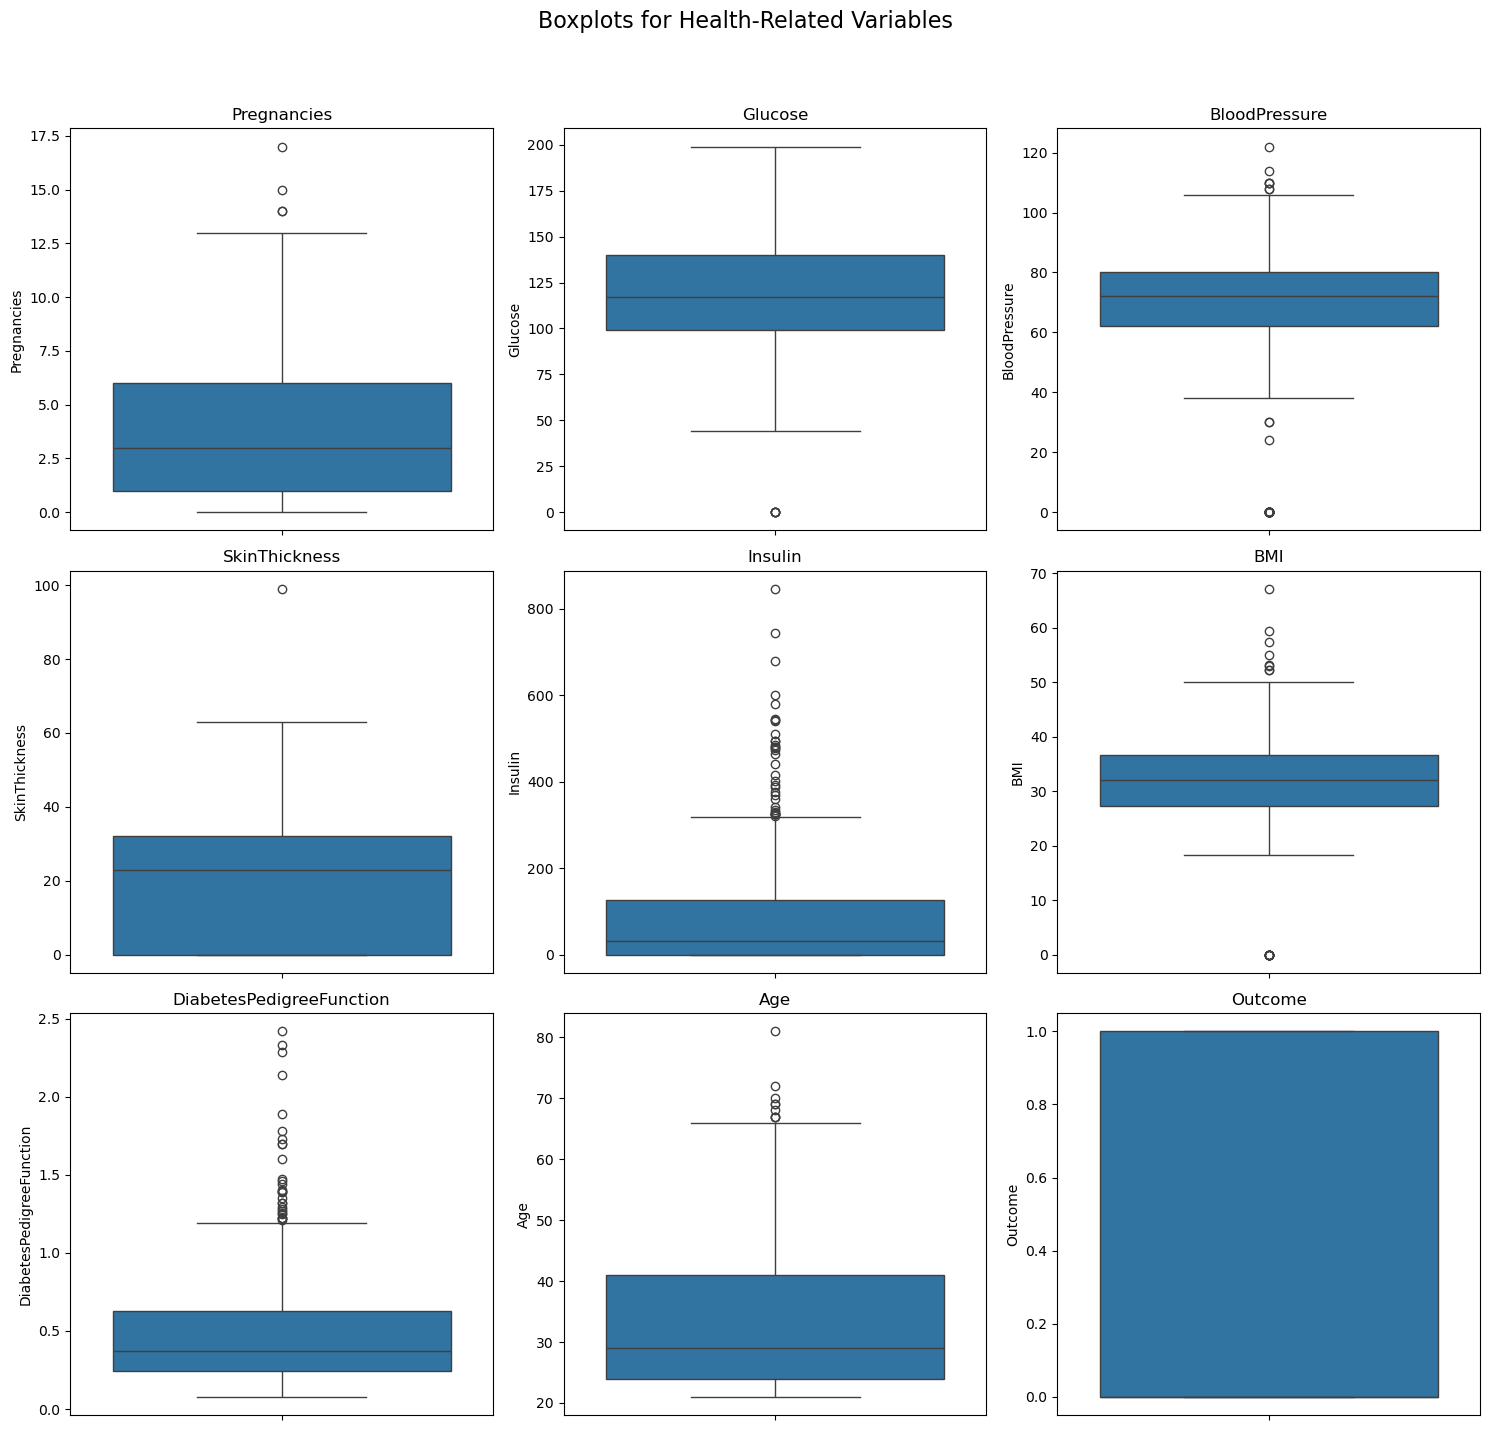

In [7]:
# Boxplot
import matplotlib.pyplot as plt
import seaborn as sns

# Liste des colonnes pour les boxplots
columns = df.columns

# Créer une grille 3x3 pour les boxplots
fig, axes = plt.subplots(3, 3, figsize=(15, 15))
fig.suptitle("Boxplots for Health-Related Variables", fontsize=16)

# Tracer chaque variable dans la matrice de sous-graphiques
for i, col in enumerate(columns):
    row, col_pos = divmod(i, 3)
    sns.boxplot(data=df, y=col, ax=axes[row, col_pos])
    axes[row, col_pos].set_title(col)

# Ajuster la mise en page
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

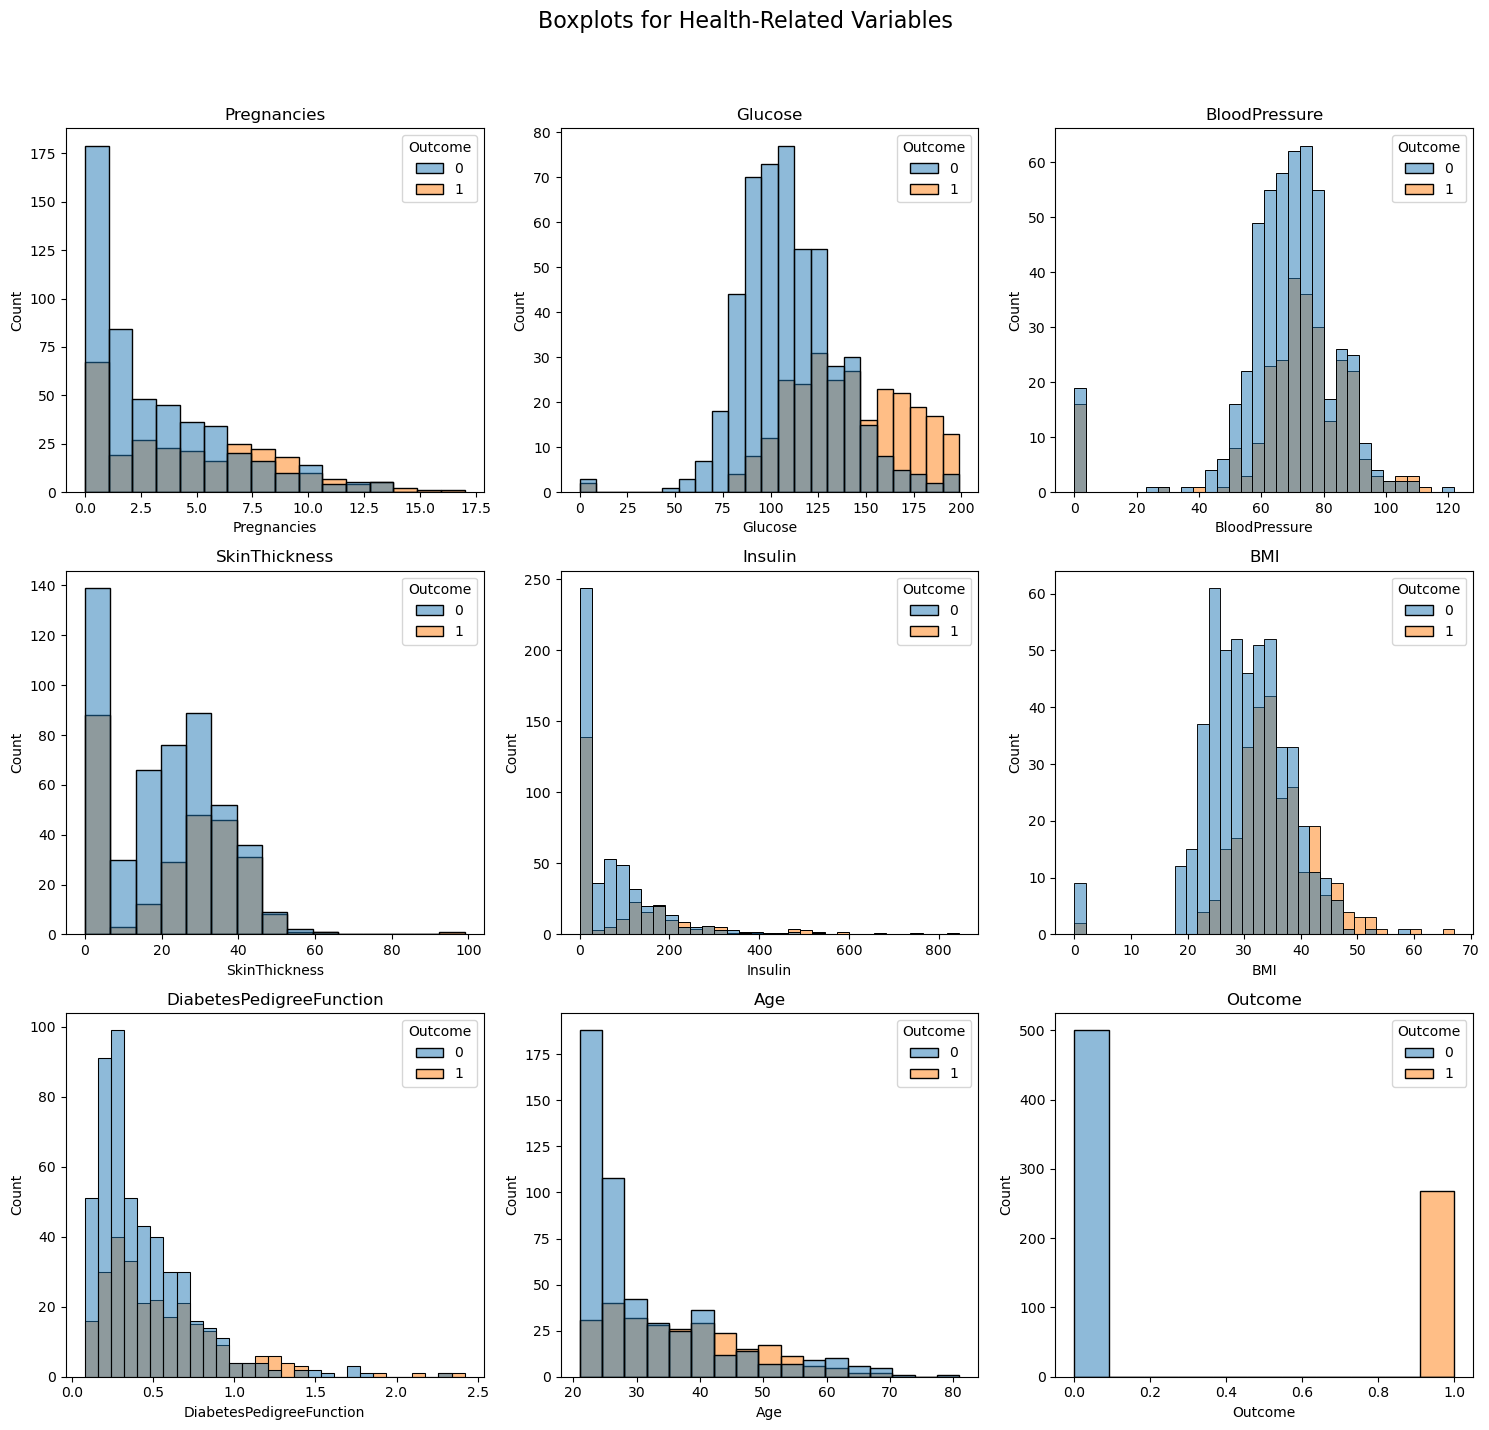

In [8]:
# Histograme
import matplotlib.pyplot as plt
import seaborn as sns

# Liste des colonnes pour les boxplots
columns = df.columns

# Créer une grille 3x3 pour les boxplots
fig, axes = plt.subplots(3, 3, figsize=(15, 15))
fig.suptitle("Boxplots for Health-Related Variables", fontsize=16)

# Tracer chaque variable dans la matrice de sous-graphiques
for i, col in enumerate(columns):
    row, col_pos = divmod(i, 3)
    sns.histplot(data=df, x=col, ax=axes[row, col_pos], hue = 'Outcome')
    axes[row, col_pos].set_title(col)

# Ajuster la mise en page
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

## Analyse bivarié

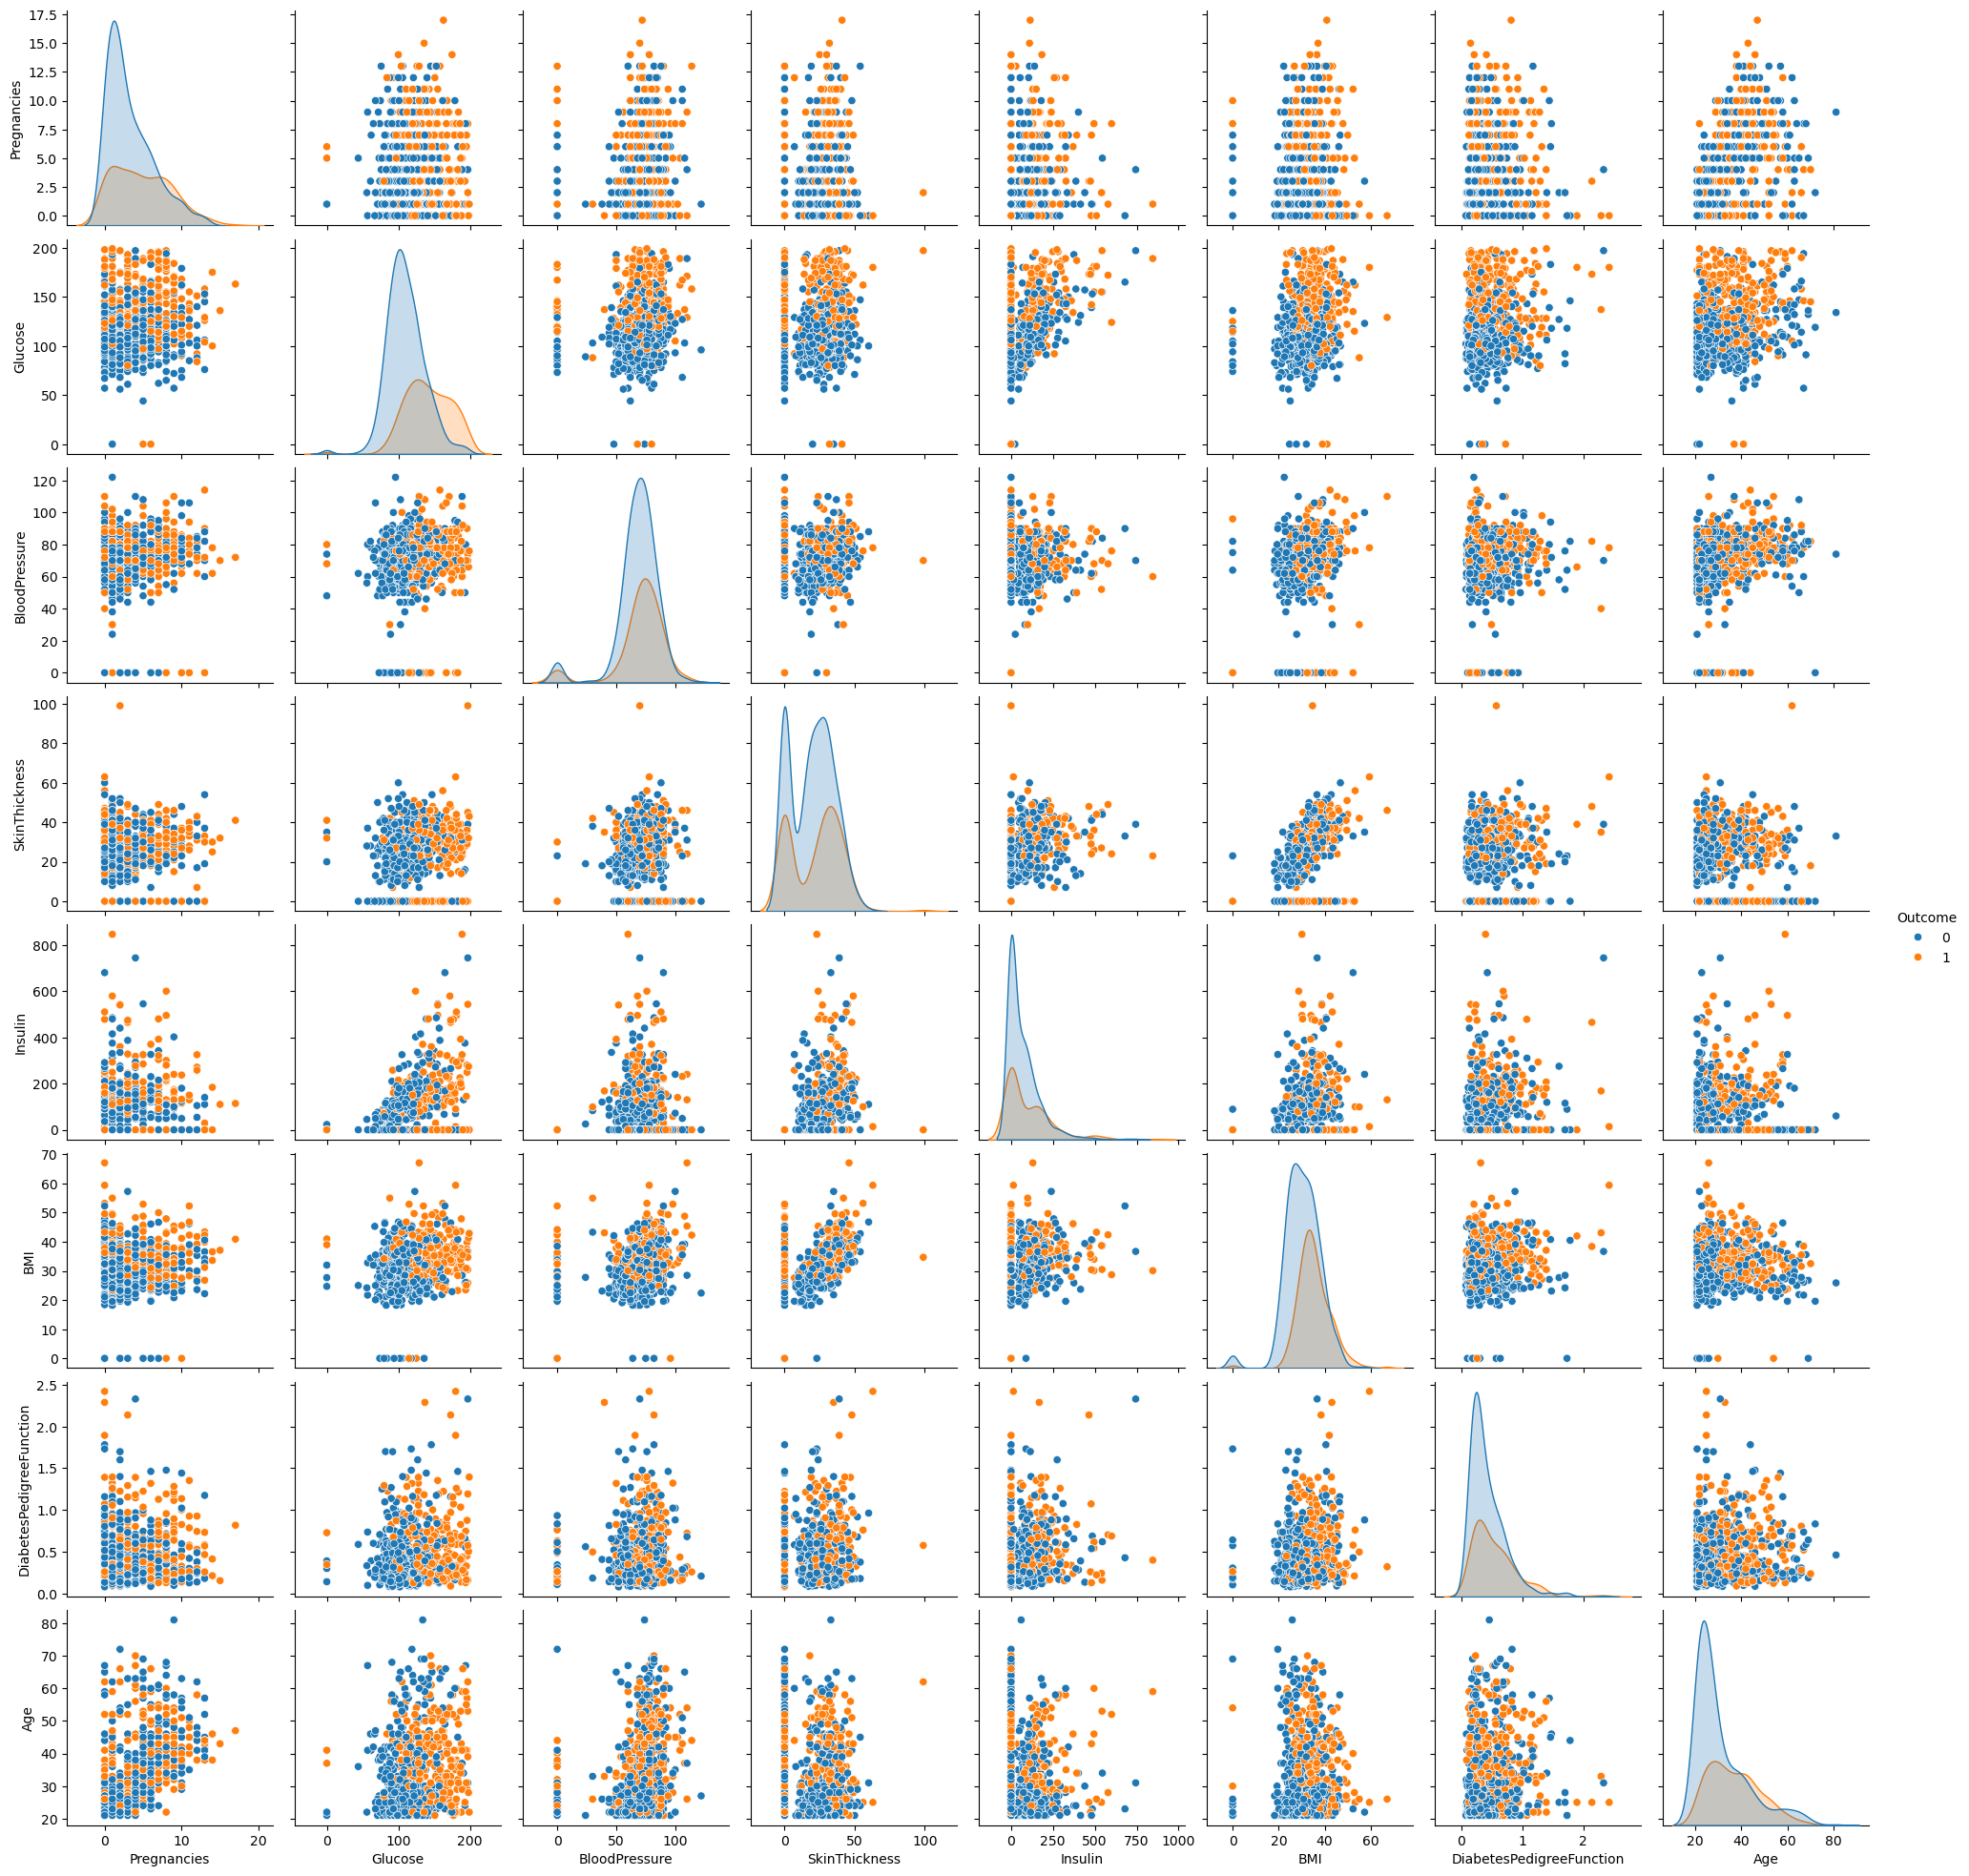

In [9]:
# Pairplot
sns.pairplot(data = df, hue = 'Outcome')

<Axes: >

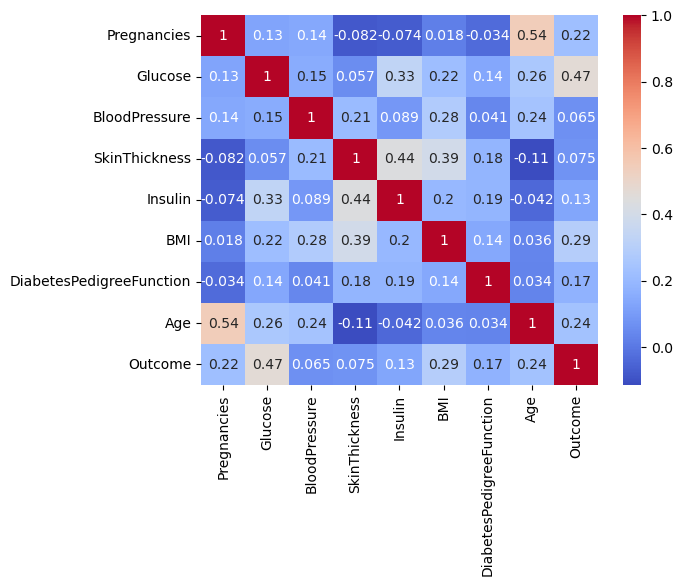

In [10]:
# Matrice de corrélation
sns.heatmap(data = df.corr(), cmap = 'coolwarm', annot = True)

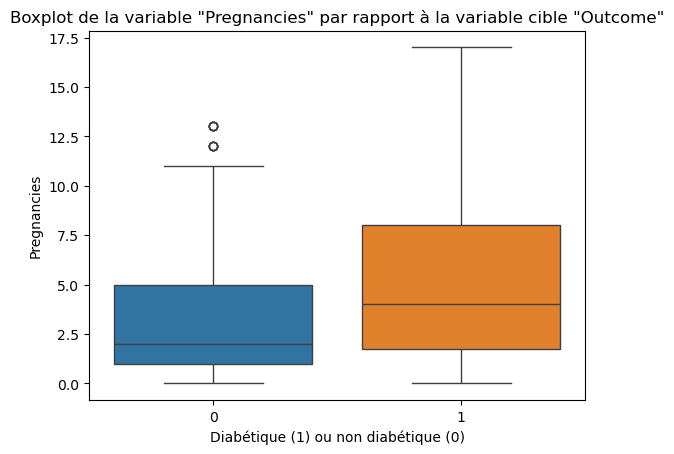

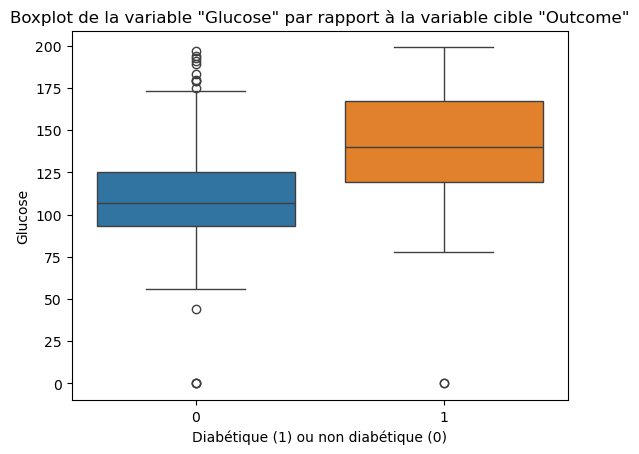

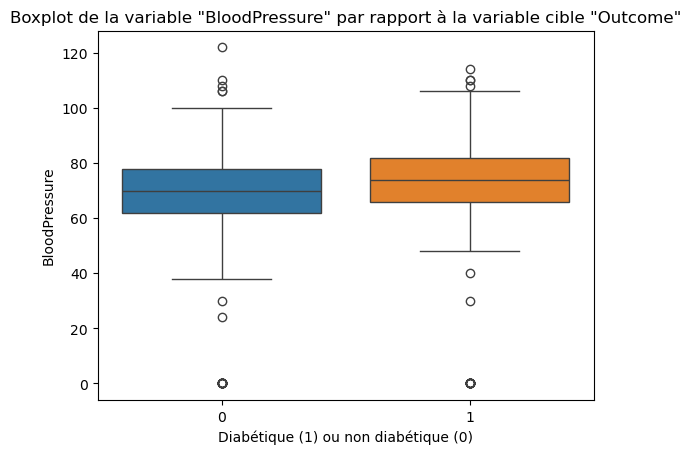

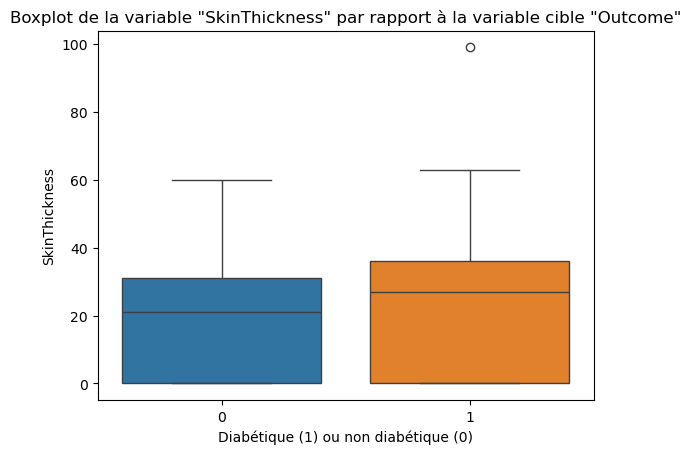

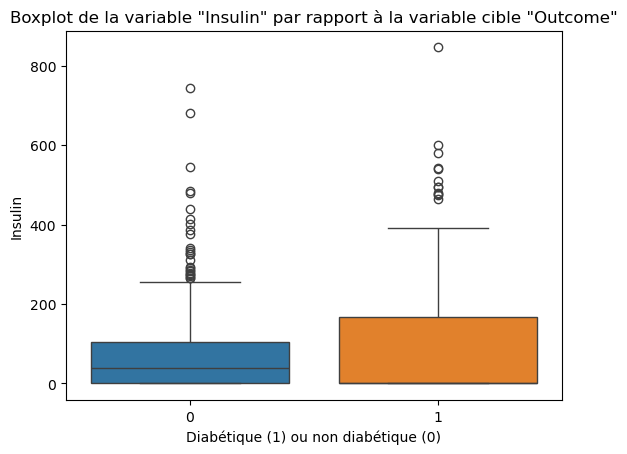

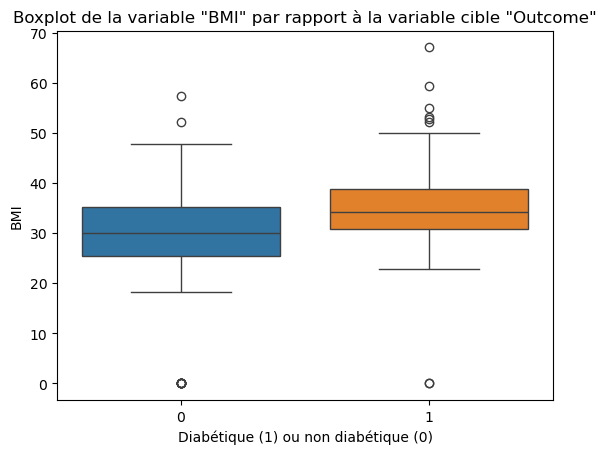

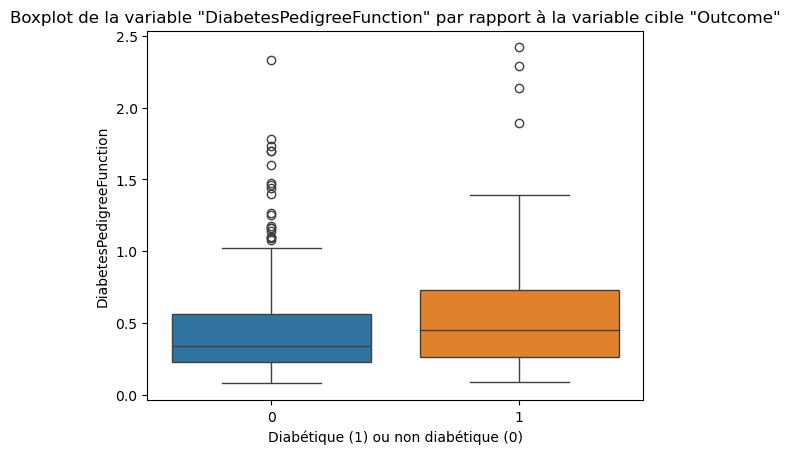

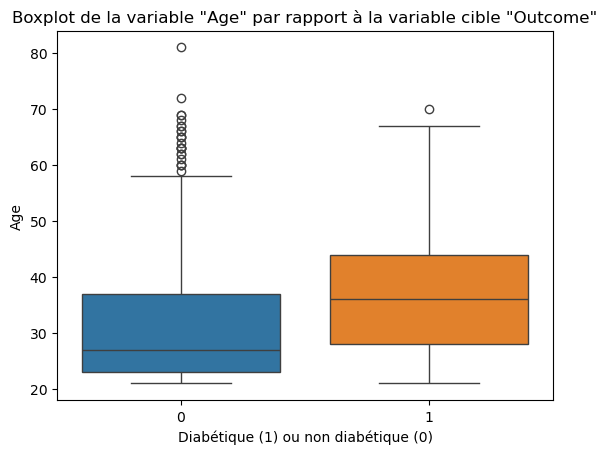

In [11]:
# Boxplot bivarié entre les variables explicatives et la variable à expliquer
palette = {0: "skyblue", 1: "salmon"}

# Boucle pour tracer les boxplots bivariés
for col in df.columns:
    if col != 'Outcome':  # S'assurer de ne pas tracer la variable cible elle-même
        sns.boxplot(data=df, x='Outcome', y=col, palette=sns.color_palette('tab10', 2), hue = 'Outcome', legend = False)
        plt.title(f'Boxplot de la variable "{col}" par rapport à la variable cible "Outcome"')
        plt.xlabel('Diabétique (1) ou non diabétique (0)')
        plt.ylabel(col)
        plt.show()

In [12]:
# Calcul des statistiques de test de Kruskal-Wallis et des p-valeurs pour chaque variable numérique
from scipy.stats import kruskal

num_vars = df.drop(columns = ['Outcome']).columns
p_values = []
for col in num_vars:
    h, pval = kruskal(df[col][df['Outcome']==0], df[col][df['Outcome']==1])
    p_values.append(pval)

    # Création d'une liste pour stocker les valeurs de significativité
is_significant = []

# Vérification de la significativité pour chaque p-valeur et stockage dans la liste is_significant
for pval in p_values:
    if pval < 0.05:
        is_significant.append('Oui')
    else:
        is_significant.append('Non')

# Affichage des résultats dans un tableau
result_table = pd.DataFrame({'Variable': num_vars, 'P-value': p_values, 'Significative': is_significant})
result_table.set_index('Variable', inplace=True)
print(result_table)

                               P-value Significative
Variable                                            
Pregnancies               3.741498e-08           Oui
Glucose                   1.198015e-39           Oui
BloodPressure             7.553110e-05           Oui
SkinThickness             1.295554e-02           Oui
Insulin                   6.563377e-02           Non
BMI                       9.716371e-18           Oui
DiabetesPedigreeFunction  1.195553e-06           Oui
Age                       1.140509e-17           Oui


## Modélisation

### 1. Modèle sans optimisation

In [14]:
# Préparation des données pour le modèle
from sklearn.model_selection import train_test_split

X = df.drop('Outcome', axis=1)  # Variables prédictives
y = df['Outcome']  # Variable cible

# Diviser la base de données en train et test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [15]:
# Création et entraînement du modèle de forêt aléatoire
from sklearn.ensemble import RandomForestClassifier

random_forest = RandomForestClassifier(oob_score=True)
random_forest.fit(X_train, y_train)

RandomForestClassifier(oob_score=True)

In [16]:
# Prédiction sur la base d'apprentissage et la base de test
from sklearn.metrics import accuracy_score, roc_auc_score, recall_score

# Prédire les classes sur les ensembles d'entraînement et de test
y_train_pred = random_forest.predict(X_train)
y_test_pred = random_forest.predict(X_test)

In [18]:
# Evaluation des performances du modèle

# Calculer les mesures de performance
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)
train_auc = roc_auc_score(y_train, y_train_pred)
test_auc = roc_auc_score(y_test, y_test_pred)
train_recall = recall_score(y_train, y_train_pred)
test_recall = recall_score(y_test, y_test_pred)

# Créer le tableau d'évaluation des performances
performance_table = pd.DataFrame({
    'Métrique': ['Accuracy', 'AUC', 'Recall'],
    'Ensemble d\'entraînement': [train_accuracy, train_auc, train_recall],
    'Ensemble de test': [test_accuracy, test_auc, test_recall]
})

# Afficher le tableau d'évaluation des performances
print(performance_table)

   Métrique  Ensemble d'entraînement  Ensemble de test
0  Accuracy                      1.0          0.753247
1       AUC                      1.0          0.735354
2    Recall                      1.0          0.672727


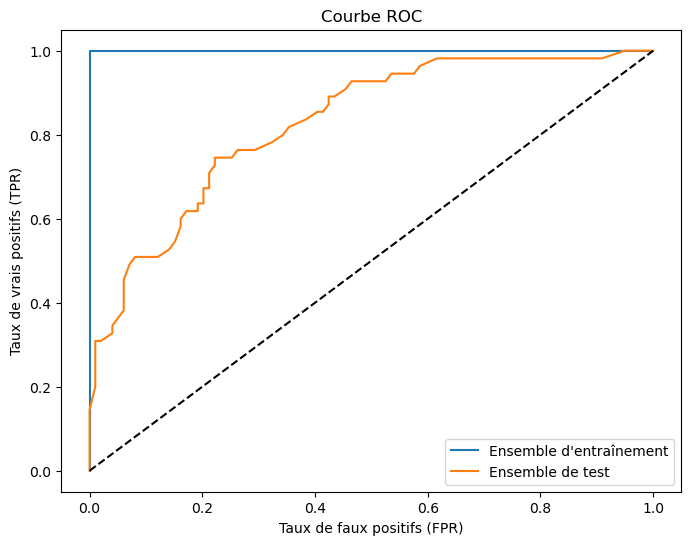

In [19]:
# Courbe de ROC
from sklearn.metrics import roc_curve

# Obtenir les scores de probabilité pour les classes positives
y_train_prob = random_forest.predict_proba(X_train)[:, 1]
y_test_prob = random_forest.predict_proba(X_test)[:, 1]

# Calculer les taux de faux positifs (FPR) et les taux de vrais positifs (TPR)
train_fpr, train_tpr, _ = roc_curve(y_train, y_train_prob)
test_fpr, test_tpr, _ = roc_curve(y_test, y_test_prob)

# Tracer les courbes ROC
plt.figure(figsize=(8, 6))
plt.plot(train_fpr, train_tpr, label='Ensemble d\'entraînement')
plt.plot(test_fpr, test_tpr, label='Ensemble de test')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('Taux de faux positifs (FPR)')
plt.ylabel('Taux de vrais positifs (TPR)')
plt.title('Courbe ROC')
plt.legend()
plt.show()

Importance des variables :
                   Variable  Importance
0                   Glucose    0.251560
1                       BMI    0.167450
2                       Age    0.145024
3  DiabetesPedigreeFunction    0.126793
4             BloodPressure    0.086400
5               Pregnancies    0.085327
6             SkinThickness    0.070912
7                   Insulin    0.066535



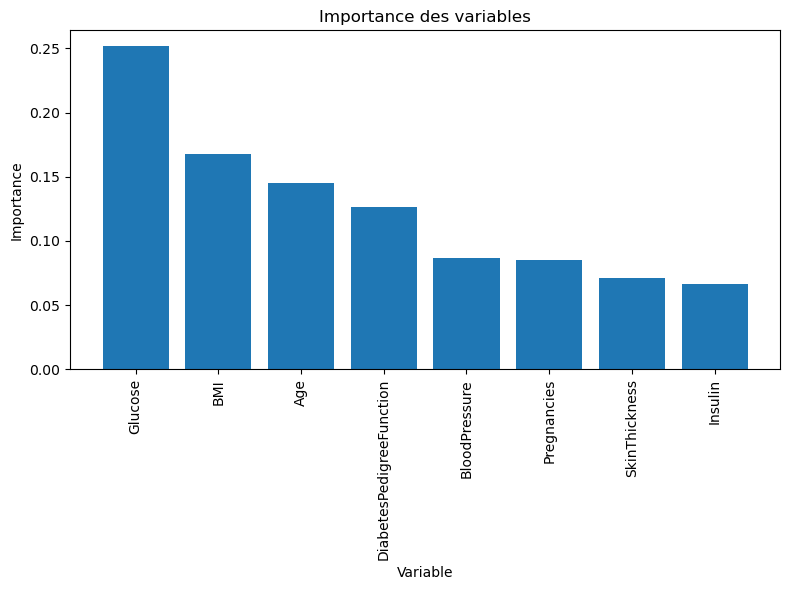

In [20]:
# Analyse de l'importance des variables

# Obtenir l'importance des variables
importance = random_forest.feature_importances_

# Créer un DataFrame pour afficher l'importance des variables
importance_df = pd.DataFrame({'Variable': X.columns, 'Importance': importance})
importance_df = importance_df.sort_values(by='Importance', ascending=False).reset_index(drop=True)

# Afficher l'importance des variables
print("Importance des variables :")
print(importance_df)
print()

# Tracer l'importance des variables
plt.figure(figsize=(8, 6))
plt.bar(importance_df['Variable'], importance_df['Importance'])
plt.xticks(rotation='vertical')
plt.xlabel('Variable')
plt.ylabel('Importance')
plt.title('Importance des variables')
plt.tight_layout()
plt.show()

### 2. Modèle avec optimisation en utilisant les seuil pratique

In [21]:
# Entrainement du modèle

# Calculer le nombre maximum de variables (max_features) à la racine carrée
max_features = int(np.sqrt(X.shape[1]))

# Créer la forêt aléatoire avec les hyperparamètres fixés
random_forest = RandomForestClassifier(n_estimators=100, max_features=max_features, random_state=42,oob_score=True)

# Entraîner le modèle sur les données d'entraînement
random_forest.fit(X_train, y_train)

RandomForestClassifier(max_features=2, oob_score=True, random_state=42)

In [23]:
# Prédire les classes sur les ensembles d'entraînement et de test
y_train_pred = random_forest.predict(X_train)
y_test_pred = random_forest.predict(X_test)

In [24]:
# Performances du modèle

# Calculer les mesures de performance
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)
train_auc = roc_auc_score(y_train, y_train_pred)
test_auc = roc_auc_score(y_test, y_test_pred)
train_recall = recall_score(y_train, y_train_pred)
test_recall = recall_score(y_test, y_test_pred)

# Créer le tableau d'évaluation des performances
performance_table = pd.DataFrame({
    'Métrique': ['Accuracy', 'AUC', 'Recall'],
    'Ensemble d\'entraînement': [train_accuracy, train_auc, train_recall],
    'Ensemble de test': [test_accuracy, test_auc, test_recall]
})

# Afficher le tableau d'évaluation des performances
print(performance_table)

   Métrique  Ensemble d'entraînement  Ensemble de test
0  Accuracy                      1.0          0.720779
1       AUC                      1.0          0.697980
2    Recall                      1.0          0.618182


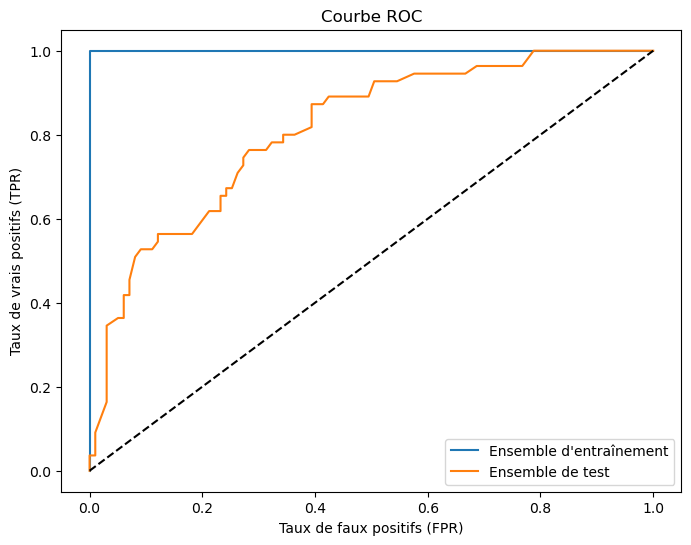

In [25]:
# Courbre de Roc

# Obtenir les scores de probabilité pour les classes positives
y_train_prob = random_forest.predict_proba(X_train)[:, 1]
y_test_prob = random_forest.predict_proba(X_test)[:, 1]

# Calculer les taux de faux positifs (FPR) et les taux de vrais positifs (TPR)
train_fpr, train_tpr, _ = roc_curve(y_train, y_train_prob)
test_fpr, test_tpr, _ = roc_curve(y_test, y_test_prob)

# Tracer les courbes ROC
plt.figure(figsize=(8, 6))
plt.plot(train_fpr, train_tpr, label='Ensemble d\'entraînement')
plt.plot(test_fpr, test_tpr, label='Ensemble de test')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('Taux de faux positifs (FPR)')
plt.ylabel('Taux de vrais positifs (TPR)')
plt.title('Courbe ROC')
plt.legend()
plt.show()

Importance des variables :
                   Variable  Importance
0                   Glucose    0.259215
1                       BMI    0.169982
2                       Age    0.140933
3  DiabetesPedigreeFunction    0.123935
4             BloodPressure    0.088463
5               Pregnancies    0.076650
6                   Insulin    0.076221
7             SkinThickness    0.064601



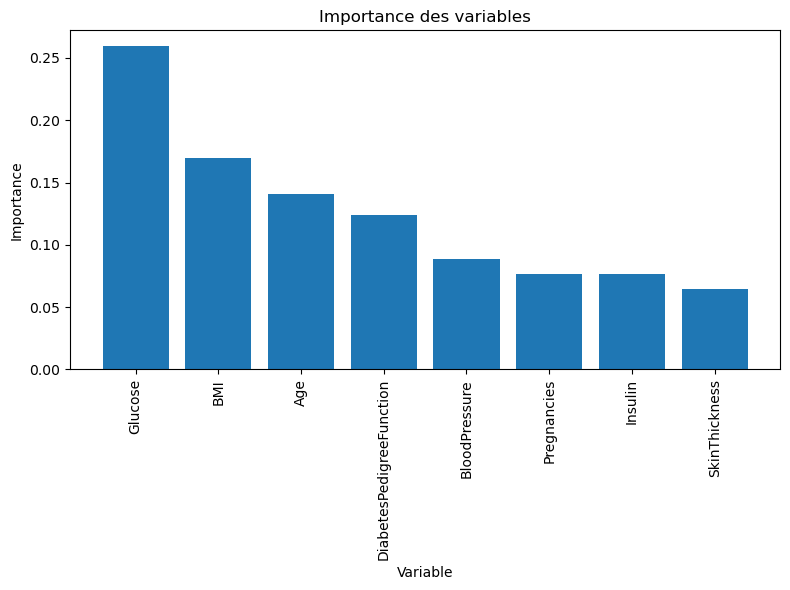

In [26]:
# Importance des variables

# Obtenir l'importance des variables
importance = random_forest.feature_importances_

# Créer un DataFrame pour afficher l'importance des variables
importance_df = pd.DataFrame({'Variable': X.columns, 'Importance': importance})
importance_df = importance_df.sort_values(by='Importance', ascending=False).reset_index(drop=True)

# Afficher l'importance des variables
print("Importance des variables :")
print(importance_df)
print()

# Tracer l'importance des variables
plt.figure(figsize=(8, 6))
plt.bar(importance_df['Variable'], importance_df['Importance'])
plt.xticks(rotation='vertical')
plt.xlabel('Variable')
plt.ylabel('Importance')
plt.title('Importance des variables')
plt.tight_layout()
plt.show()

### 3. Modèle avec optimisation via la validation croisée

In [31]:
from sklearn.model_selection import train_test_split, GridSearchCV
# Définir les hyperparamètres à tester à l'aide de GridSearch
param_grid = {
    'n_estimators': [100, 200, 300,500],
    'max_depth': [1,2,3,4,6,7,8]
}

# Créer un modèle de forêt aléatoire
rf_model = RandomForestClassifier(oob_score=True, random_state=42)

# Utiliser GridSearch pour trouver les meilleurs paramètres
grid_search = GridSearchCV(rf_model, param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Afficher les meilleurs paramètres trouvés
print("Meilleurs paramètres :", grid_search.best_params_)

Meilleurs paramètres : {'max_depth': 6, 'n_estimators': 500}


In [33]:
# Créer un modèle de forêt aléatoire avec les meilleurs paramètres
random_forest = RandomForestClassifier(n_estimators=grid_search.best_params_['n_estimators'], max_depth=grid_search.best_params_['max_depth'], oob_score=True, random_state=42)
# Entraîner le modèle sur les données d'entraînement
random_forest.fit(X_train, y_train)

RandomForestClassifier(max_depth=6, n_estimators=500, oob_score=True,
                       random_state=42)

In [34]:
# Prédire les classes sur les ensembles d'entraînement et de test
y_train_pred = random_forest.predict(X_train)
y_test_pred = random_forest.predict(X_test)

In [35]:
# Performance de la forêt aléatoire
# Calculer les mesures de performance
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)
train_auc = roc_auc_score(y_train, y_train_pred)
test_auc = roc_auc_score(y_test, y_test_pred)
train_recall = recall_score(y_train, y_train_pred)
test_recall = recall_score(y_test, y_test_pred)

# Créer le tableau d'évaluation des performances
performance_table = pd.DataFrame({
    'Métrique': ['Accuracy', 'AUC', 'Recall'],
    'Ensemble d\'entraînement': [train_accuracy, train_auc, train_recall],
    'Ensemble de test': [test_accuracy, test_auc, test_recall]
})

# Afficher le tableau d'évaluation des performances
print(performance_table)

   Métrique  Ensemble d'entraînement  Ensemble de test
0  Accuracy                 0.910423          0.759740
1       AUC                 0.882998          0.732323
2    Recall                 0.793427          0.636364


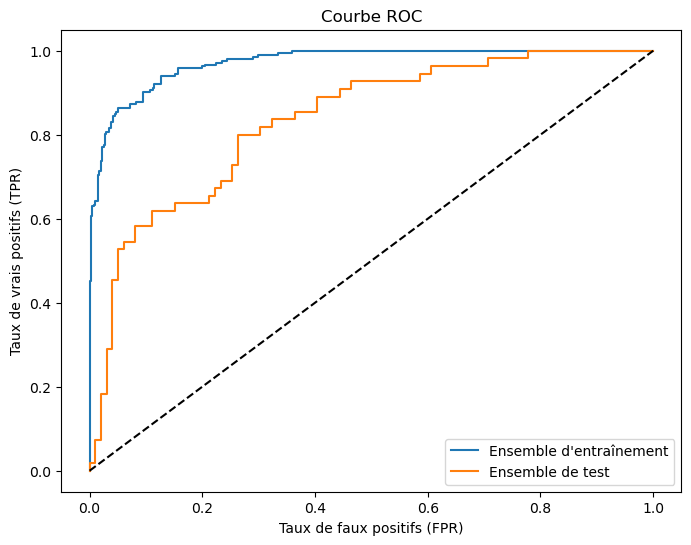

In [37]:
# Courbre ROC

# Obtenir les scores de probabilité pour les classes positives
y_train_prob = random_forest.predict_proba(X_train)[:, 1]
y_test_prob = random_forest.predict_proba(X_test)[:, 1]

# Calculer les taux de faux positifs (FPR) et les taux de vrais positifs (TPR)
train_fpr, train_tpr, _ = roc_curve(y_train, y_train_prob)
test_fpr, test_tpr, _ = roc_curve(y_test, y_test_prob)

# Tracer les courbes ROC
plt.figure(figsize=(8, 6))
plt.plot(train_fpr, train_tpr, label='Ensemble d\'entraînement')
plt.plot(test_fpr, test_tpr, label='Ensemble de test')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('Taux de faux positifs (FPR)')
plt.ylabel('Taux de vrais positifs (TPR)')
plt.title('Courbe ROC')
plt.legend()
plt.show()

Importance des variables :
                   Variable  Importance
0                   Glucose    0.317728
1                       BMI    0.177691
2                       Age    0.158395
3  DiabetesPedigreeFunction    0.095139
4                   Insulin    0.070005
5               Pregnancies    0.066179
6             BloodPressure    0.060972
7             SkinThickness    0.053892



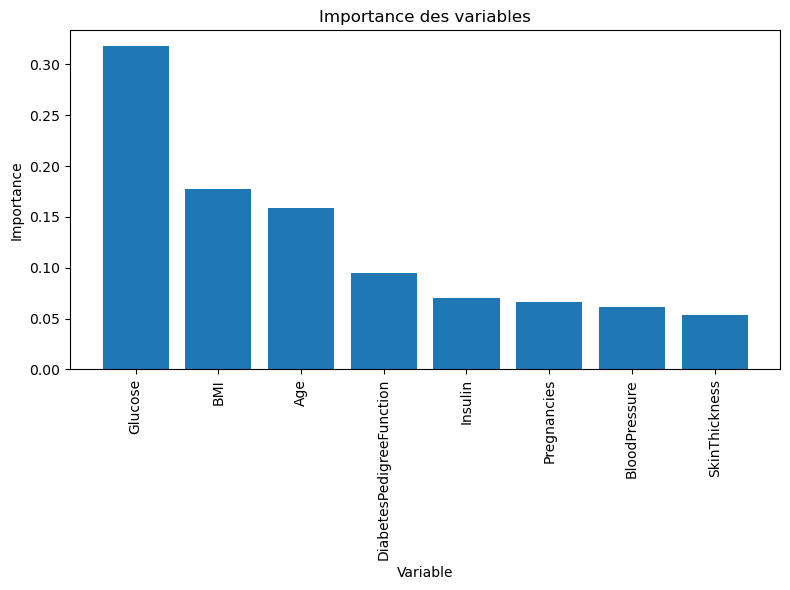

In [38]:
# Importance des variables

# Obtenir l'importance des variables
importance = random_forest.feature_importances_

# Créer un DataFrame pour afficher l'importance des variables
importance_df = pd.DataFrame({'Variable': X.columns, 'Importance': importance})
importance_df = importance_df.sort_values(by='Importance', ascending=False).reset_index(drop=True)

# Afficher l'importance des variables
print("Importance des variables :")
print(importance_df)
print()

# Tracer l'importance des variables
plt.figure(figsize=(8, 6))
plt.bar(importance_df['Variable'], importance_df['Importance'])
plt.xticks(rotation='vertical')
plt.xlabel('Variable')
plt.ylabel('Importance')
plt.title('Importance des variables')
plt.tight_layout()
plt.show()